# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#the hardest part
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

lat = []
lng = []
city_name = []
country = []
date = []
cloudiness = []
max_temp = []
humidity = []
wind_speed = []


print("Beginning Data Retrieval")
print("--------------------------------------------")
#start the loop through the cities for the url to grab it's info
count = 1
for city in cities:
    city = city
    query_url = f"{url}appid={weather_api_key}&q={city}"
    response = requests.get(query_url).json()   

#making sure the code doesn't break  
    try: 
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {x}|{city}")
#needs to sleep or it will cost moneyyy
        count = count + 1 
        time.sleep(1.5)
        
    except (KeyError):
        print("City not found. skipping.")
       

Beginning Data Retrieval
--------------------------------------------
Processing record 1|chenzhou
Processing record 2|los negros
Processing record 3|flin flon
Processing record 4|punta arenas
Processing record 5|gawler
Processing record 6|praia da vitoria
Processing record 7|mar del plata
Processing record 8|vaini
Processing record 9|tasiilaq
Processing record 10|jamestown
Processing record 11|cape town
Processing record 12|voh
Processing record 13|mahebourg
Processing record 14|arraial do cabo
Processing record 15|bontang
Processing record 16|nikolskoye
Processing record 17|labrea
Processing record 18|tiksi
Processing record 19|manavalakurichi
Processing record 20|saint george
Processing record 21|hamilton
Processing record 22|port elizabeth
Processing record 23|kavieng
Processing record 24|yulara
Processing record 25|ushuaia
Processing record 26|barrow
Processing record 27|milkovo
Processing record 28|mataura
City not found. skipping.
Processing record 29|camacha
Processing record 3

Processing record 243|grafton
Processing record 244|isiolo
Processing record 245|luganville
Processing record 246|handan
Processing record 247|bengkulu
Processing record 248|clearlake
City not found. skipping.
Processing record 249|chicama
Processing record 250|jinka
Processing record 251|victoria
Processing record 252|upington
Processing record 253|hambantota
Processing record 254|neubrandenburg
Processing record 255|salamanca
Processing record 256|lumberton
Processing record 257|zlocieniec
Processing record 258|aasiaat
Processing record 259|tahe
Processing record 260|nuevitas
Processing record 261|teknaf
Processing record 262|san jeronimito
Processing record 263|mackay
Processing record 264|maningrida
Processing record 265|sibolga
Processing record 266|beloha
Processing record 267|coihaique
Processing record 268|matara
Processing record 269|thompson
Processing record 270|santa isabel do rio negro
Processing record 271|pisco
Processing record 272|petatlan
Processing record 273|korhogo

Processing record 486|isabela
Processing record 487|goderich
Processing record 488|coffs harbour
Processing record 489|bartica
Processing record 490|sao desiderio
Processing record 491|siniscola
City not found. skipping.
Processing record 492|mogadishu
Processing record 493|peace river
Processing record 494|bonavista
Processing record 495|yumen
Processing record 496|asosa
Processing record 497|broome
Processing record 498|saint-augustin
Processing record 499|santa marta
Processing record 500|suntar
Processing record 501|el centro
Processing record 502|lorengau
Processing record 503|nadym
Processing record 504|dingle
Processing record 505|santa fe
Processing record 506|avera
City not found. skipping.
Processing record 507|lerwick
Processing record 508|marzuq
Processing record 509|verkhoyansk
Processing record 510|puerto escondido
Processing record 511|tuatapere
Processing record 512|ferrol
Processing record 513|vokhma
Processing record 514|ostersund
Processing record 515|jambi
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Creating city dataframe
cities_df = pd.DataFrame({"City":city_name, 
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Humidity":humidity,
                        "Cloudiness":cloudiness,
                        "Wind Speed":wind_speed,
                        "Country":country,  
                        "Date":date})


cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chenzhou,25.8000,113.0333,64.76,83,100,6.15,CN,1633660180
1,Los Negros,-17.7333,-63.4333,72.95,63,47,3.38,BO,1633660181
2,Flin Flon,54.7682,-101.8650,44.33,46,5,5.70,CA,1633660183
3,Punta Arenas,-53.1500,-70.9167,44.71,61,0,17.27,CL,1633660185
4,Gawler,-34.6000,138.7333,71.22,31,100,11.14,AU,1633660187


In [85]:
#save it to a csv for vacationpy
cities_df.to_csv("cities.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
#there are no cities with above >100% humidity, i tid to find one using the loc method

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

I just have to copy and past the same set up, but change the labels and the columns used, but all the data is already collected.

## Latitude vs. Temperature Plot

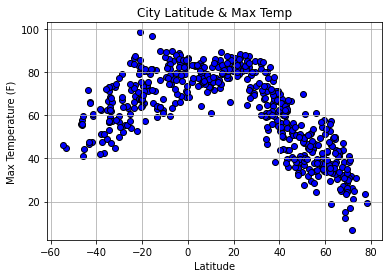

In [91]:

#Creating plot
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude & Max Temp")
plt.savefig("output_data/Lat_maxtemp")
plt.show()

## Latitude vs. Humidity Plot

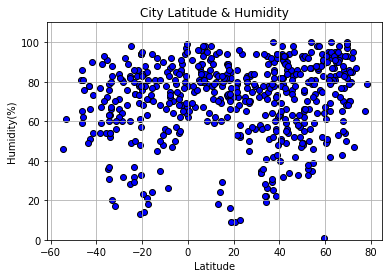

In [92]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.ylim(0, cities_df["Humidity"].max()+10)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude & Humidity")
plt.savefig("output_data/Lat_humidity")
plt.show()

## Latitude vs. Cloudiness Plot

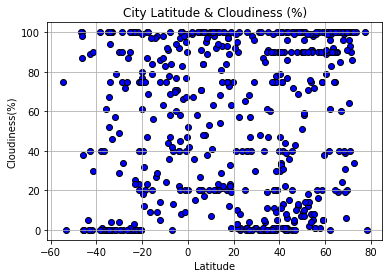

In [93]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude & Cloudiness (%)")
plt.savefig("output_data/Lat_clouds")
plt.show()

## Latitude vs. Wind Speed Plot

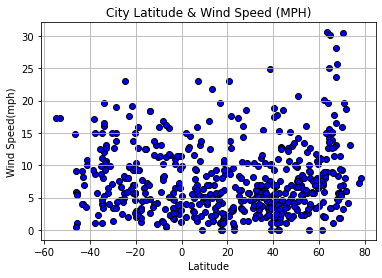

In [94]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude & Wind Speed (MPH)")
plt.savefig("output_data/Lat_windy")
plt.show()

## Linear Regression

In [48]:
#separate the the hemisphers by loc lat for the next graphs
north_hem_df = cities_df.loc[(cities_df['Lat']>0)]
south_hem_df = cities_df.loc[(cities_df['Lat'] < 0)]
north_hem_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chenzhou,25.8000,113.0333,64.76,83,100,6.15,CN,1633660180
2,Flin Flon,54.7682,-101.8650,44.33,46,5,5.70,CA,1633660183
5,Praia da Vitória,38.7333,-27.0667,66.76,94,20,4.23,PT,1633660189
8,Tasiilaq,65.6145,-37.6368,32.16,53,19,8.90,GL,1633660194
9,Jamestown,42.0970,-79.2353,66.29,90,90,1.99,US,1633660122
...,...,...,...,...,...,...,...,...,...
544,Shizunai-furukawachō,42.3339,142.3669,62.38,61,22,11.01,JP,1633661223
546,Dudinka,69.4058,86.1778,34.99,99,100,9.35,RU,1633661240
547,Qom,34.6401,50.8764,54.52,57,0,6.96,IR,1633661242
548,Strezhevoy,60.7333,77.5889,39.18,90,99,10.89,RU,1633661244


From previous hw to remind how to do linear regression

x_values = avg_cap_vol['Weight (g)']
y_values = avg_cap_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)') 
plt.ylabel('Average Tumore Volume (mm3)')
plt.annotate(line_eq,(22,40),fontsize=10,color="red")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

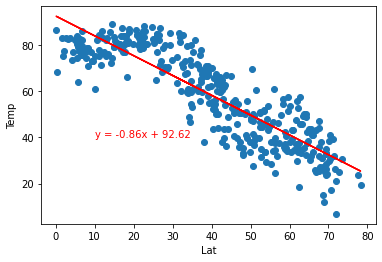

In [96]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lat") 
plt.ylabel("Temp")
plt.title("Latitude vs Temp")
plt.annotate(line_eq,(10,40),fontsize=10,color="red")
plt.savefig("output_data/maxtemp_latitude_regres")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

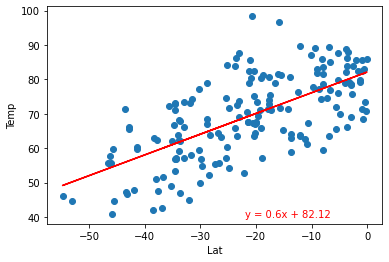

In [97]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lat") 
plt.ylabel("Temp")
plt.title("Latitude vs Temp")
plt.annotate(line_eq,(-22,40),fontsize=10,color="red")
plt.savefig("output_data/maxtemp_southlatitude_regres")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

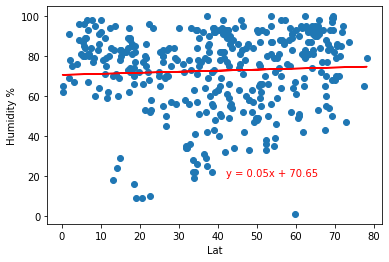

In [98]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lat") 
plt.ylabel("Humidity %")
plt.title("Latitude vs Humidity")
plt.annotate(line_eq,(42,20),fontsize=10,color="red")
plt.savefig("output_data/humidity_northlatitude_regres")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

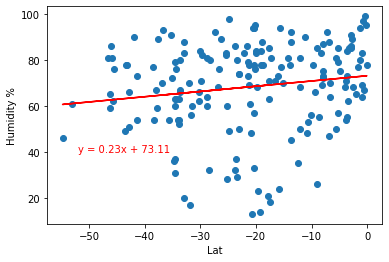

In [99]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lat") 
plt.ylabel("Humidity %")
plt.title("Latitude vs Humidity")
plt.annotate(line_eq,(-52,40),fontsize=10,color="red")
plt.savefig("output_data/humidity_southlatitude_regres")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

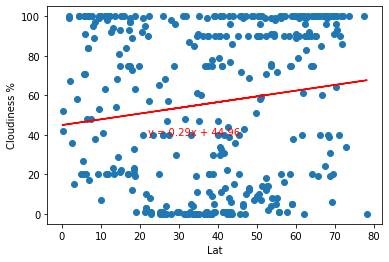

In [100]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lat") 
plt.ylabel("Cloudiness %")
plt.title("Latitude vs Cloudiness")
plt.annotate(line_eq,(22,40),fontsize=10,color="red")
plt.savefig("output_data/cloudiness_northlatitude_regres")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

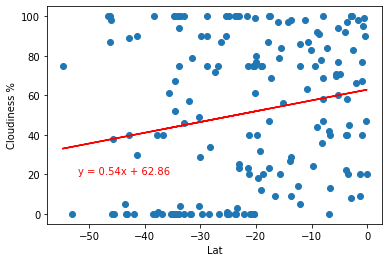

In [101]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lat") 
plt.ylabel("Cloudiness %")
plt.title("Latitude vs Cloudiness")
plt.annotate(line_eq,(-52,20),fontsize=10,color="red")
plt.savefig("output_data/cloudiness_southlatitude_regres")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

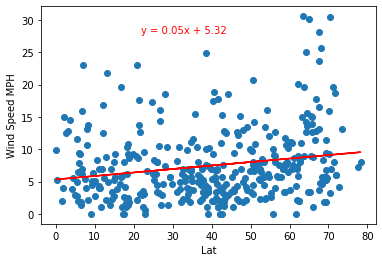

In [102]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lat") 
plt.ylabel("Wind Speed MPH")
plt.title("Latitude vs Windspeed(MPH)")
plt.annotate(line_eq,(22,28),fontsize=10,color="red")
plt.savefig("output_data/windspeed_northlatitude_regres")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

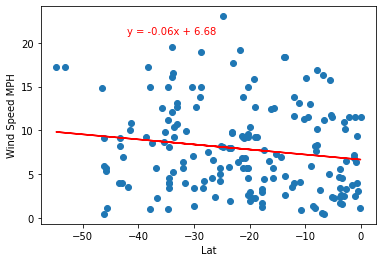

In [103]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lat") 
plt.ylabel("Wind Speed MPH")
plt.title("Latitude vs Windspeed (MPH)")
plt.annotate(line_eq,(-42,21),fontsize=10,color="red")
plt.savefig("output_data/windspeed_southlatitude_regres")
plt.show()

For Part I, you must include a written description of three observable trends based on the data.
Obeservable Trends:
    1. The strongest correlations are that the closer to the equator the higher the temperatures are for those places.
    2. The weakest correlation is that lattitude has little affect on humidity, which is slightyl suprising to me.
    3. The average wind speed seems to be around 7mph, but interesting we can see a cluster of dots latitude 40, so I'm not sure if the data is biased for that region or we are seeing a small storm go by that area!
